In [48]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv('../data/processed/HotelReservationsLabelP.csv')

df.head(1)

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,no_total_people,no_total_nights,season_group
0,1,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,2,3,Autumn


In [50]:
from scripts import data_preprocess
# Definir a coluna alvo
target_column = 'label_avg_price_per_room'

# Pré-processamento dos dados
preprocessor, X, y = data_preprocess.preprocess(df, target_column)

# Dividir os dados em conjuntos de treinamento e teste
preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'no_total_people', 'no_total_nights'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'season_group'],
      dtype='object'))])

In [51]:
X.head(1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,no_total_people,no_total_nights,season_group
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,2,3,Autumn


In [52]:
y.head(1)

0    1
Name: label_avg_price_per_room, dtype: int64

In [53]:
X_prep = preprocessor.fit_transform(X)
X_prep

array([[2., 0., 1., ..., 0., 0., 0.],
       [2., 0., 2., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 1.],
       ...,
       [2., 0., 2., ..., 0., 1., 0.],
       [2., 0., 0., ..., 1., 0., 0.],
       [2., 0., 1., ..., 0., 0., 1.]])

In [54]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

feature_names = list(numeric_features) + list(categorical_feature_names)
X_df = pd.DataFrame(X_prep, columns=feature_names)
X_df.head(1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter
0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [55]:
from sklearn.model_selection import train_test_split
from scripts import data_oversampler

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

X_resampled, y_resampled = data_oversampler.oversample(X_train, y_train)
X_resampled.head(1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter
0,2.0,0.0,1.0,3.0,0.0,200.0,2018.0,8.0,29.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [56]:
y_resampled.head(1)

0    2
Name: label_avg_price_per_room, dtype: int64

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

              precision    recall  f1-score   support

           1       0.84      0.84      0.84      3288
           2       0.79      0.80      0.80      4085
           3       0.87      0.85      0.86      3510

    accuracy                           0.83     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.83      0.83      0.83     10883

Accuracy:  0.8306533125057429


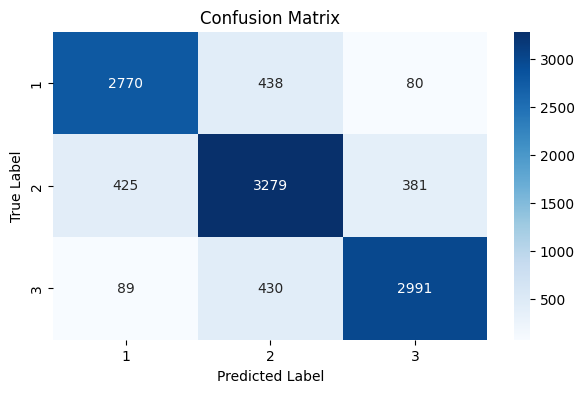

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = dtree.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

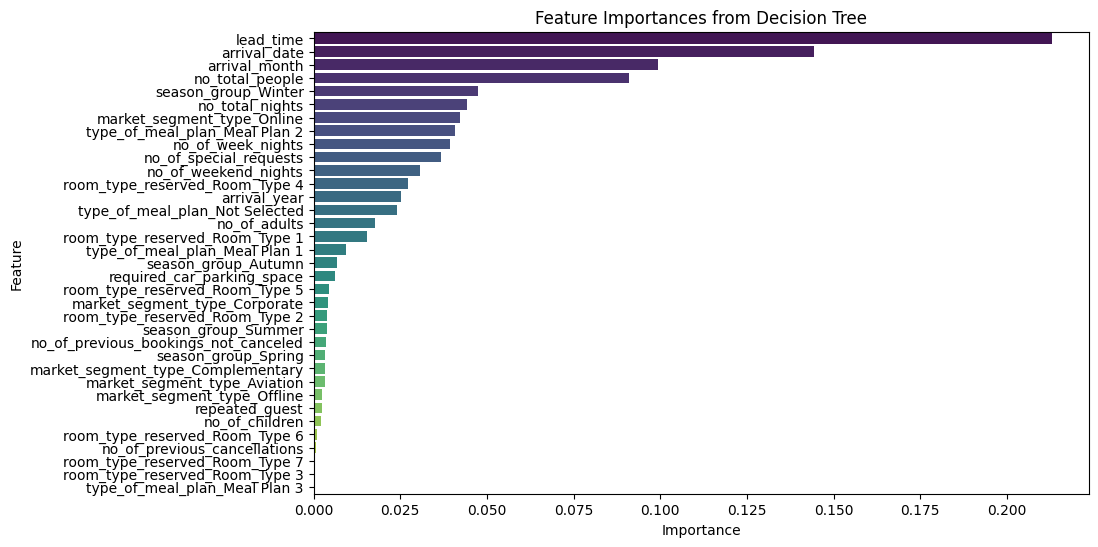

In [59]:
importances = dtree.feature_importances_
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
plt.title('Feature Importances from Decision Tree')
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20, 50],
    'max_features': [None],
    'min_impurity_decrease': [0.0001, 0.01, 0.1]
}
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Accuracy: ", accuracy_score(y_test, y_pred_best))

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 2}
[[2778  425   85]
 [ 467 3202  416]
 [  77  388 3045]]
              precision    recall  f1-score   support

           1       0.84      0.84      0.84      3288
           2       0.80      0.78      0.79      4085
           3       0.86      0.87      0.86      3510

    accuracy                           0.83     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.83      0.83      0.83     10883

Accuracy:  0.829275016080125
